```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. 

```

# Synthetic Datasets Generation


In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# To eliminate Yellowbrick warming: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
import matplotlib.font_manager

import seaborn as sns

---

## Regression
The [make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function from the scikit-learn library can be used to define a dataset. It provides control over the number of samples, number of input features, and, importantly, the number of relevant and redundant input features. 

In [3]:
from sklearn.datasets import make_regression

# Define a dataset with 1,000 samples, each with 100 input features where 10 are informative and the remaining 90 are redundant
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=42)

# First row
X[:1]

array([[-0.35327269, -1.46920143, -0.74867396,  0.56832597,  0.442359  ,
        -0.2098729 ,  0.48296544, -0.08654811, -0.27612319,  0.32845342,
         0.36697483,  1.4116349 , -0.47735134,  1.00938685,  0.38587655,
        -0.16266788, -0.69595893, -1.12391152, -0.0333786 ,  0.91569887,
         0.01509605,  0.12716749, -0.0617523 , -1.21019613,  0.53888247,
         0.36816415, -1.85967954,  0.05570509, -0.33430215,  0.78232871,
         0.44475834,  0.51282893, -0.66875255,  0.29463573,  0.42644646,
         1.83024856, -0.01897557, -0.46777615,  0.30113826, -1.23725692,
         0.45374338,  0.41727583, -0.15008832, -1.76726887,  0.16306499,
        -0.7593587 , -0.0652204 , -0.65089772, -0.18573257, -0.31933449,
         1.40522828,  0.75961813, -0.53790334, -0.10618352,  0.38602263,
         2.19959551, -1.3402175 , -1.21264274, -2.13120957, -0.12046564,
         0.00489506,  2.69353229, -1.32490965,  1.17708632,  0.2150338 ,
         0.07220661, -1.07234004,  1.23015745,  0.6

---

## Classification
We can use the [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a synthetic binary classification problem.

In [4]:
from sklearn.datasets import make_classification

# Define dataset with 1,000 examples and 10 input features, five of which are important and five of which are redundant
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


---

## Generate random features
Generate two random variables that are not correlated in any way with the target variable (survived):
- random_num is a high cardinality numerical variable (as many unique values as records),
- random_cat is a low cardinality categorical variable (3 possible values).

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml

In [5]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

rng = np.random.RandomState(seed=42)
X['random_cat'] = rng.randint(3, size=X.shape[0])
X['random_num'] = rng.randn(X.shape[0])

In [6]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,random_cat,random_num
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",2,-1.110576
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1.752270
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",2,0.935678
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",2,1.271555
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,0.721672


---

## Outliers
Generate a population 10,000 random numbers drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5. Numbers drawn from a Gaussian distribution will have outliers. That is, by virtue of the distribution itself, there will be a few values that will be a long way from the mean, rare values that we can identify as outliers.

We will use the `randn()` function to generate random Gaussian values with a mean of 0 and a standard deviation of 1, then multiply the results by our own standard deviation and add the mean to shift the values into the preferred range.

The pseudorandom number generator is seeded to ensure that we get the same sample of numbers each time the code is run.

In [3]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

In [4]:
# Seed the random number generator
seed(1)

# Generate univariate observations
data = 5 * randn(10000) + 50

# Summarize
print(f'mean={mean(data):.3f} stdv={std(data):.3f}')

mean=50.049 stdv=4.994


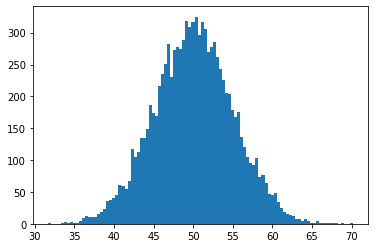

In [8]:
# Plot the data distribution
plt.hist(x=data, bins=100)
plt.show()